In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset
url = 'https://github.com/mwaskom/seaborn-data/raw/master/iris.csv'
data = pd.read_csv(url)

In [12]:
# Mostrar los primeros registros del dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Resumen
print('Data shape: ',data.shape)

Data shape:  (150, 5)


In [11]:
# Información del data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# Descripción del dataset
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# # Agrupación de Clases
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

<Axes: >

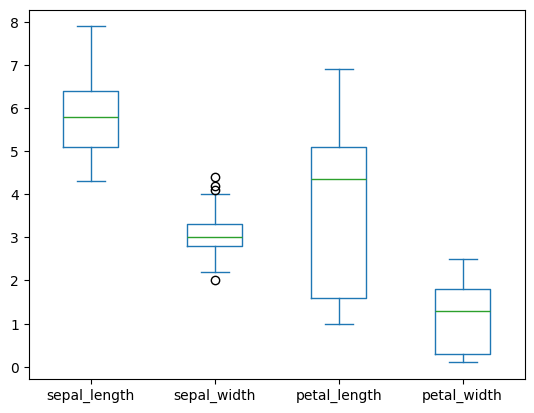

In [8]:
# Gráfico de caja dataset
data.plot(kind='box', sharex=False, sharey=False)

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

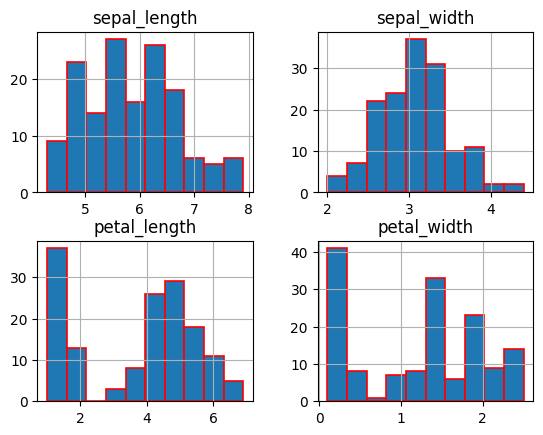

In [13]:
# Histograma
data.hist(edgecolor='red',linewidth=1.2)

<Axes: xlabel='species', ylabel='petal_length'>

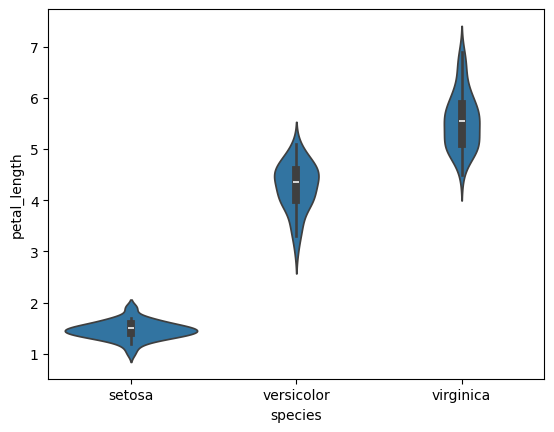

In [14]:
sns.violinplot(data=data, x='species',y='petal_length')

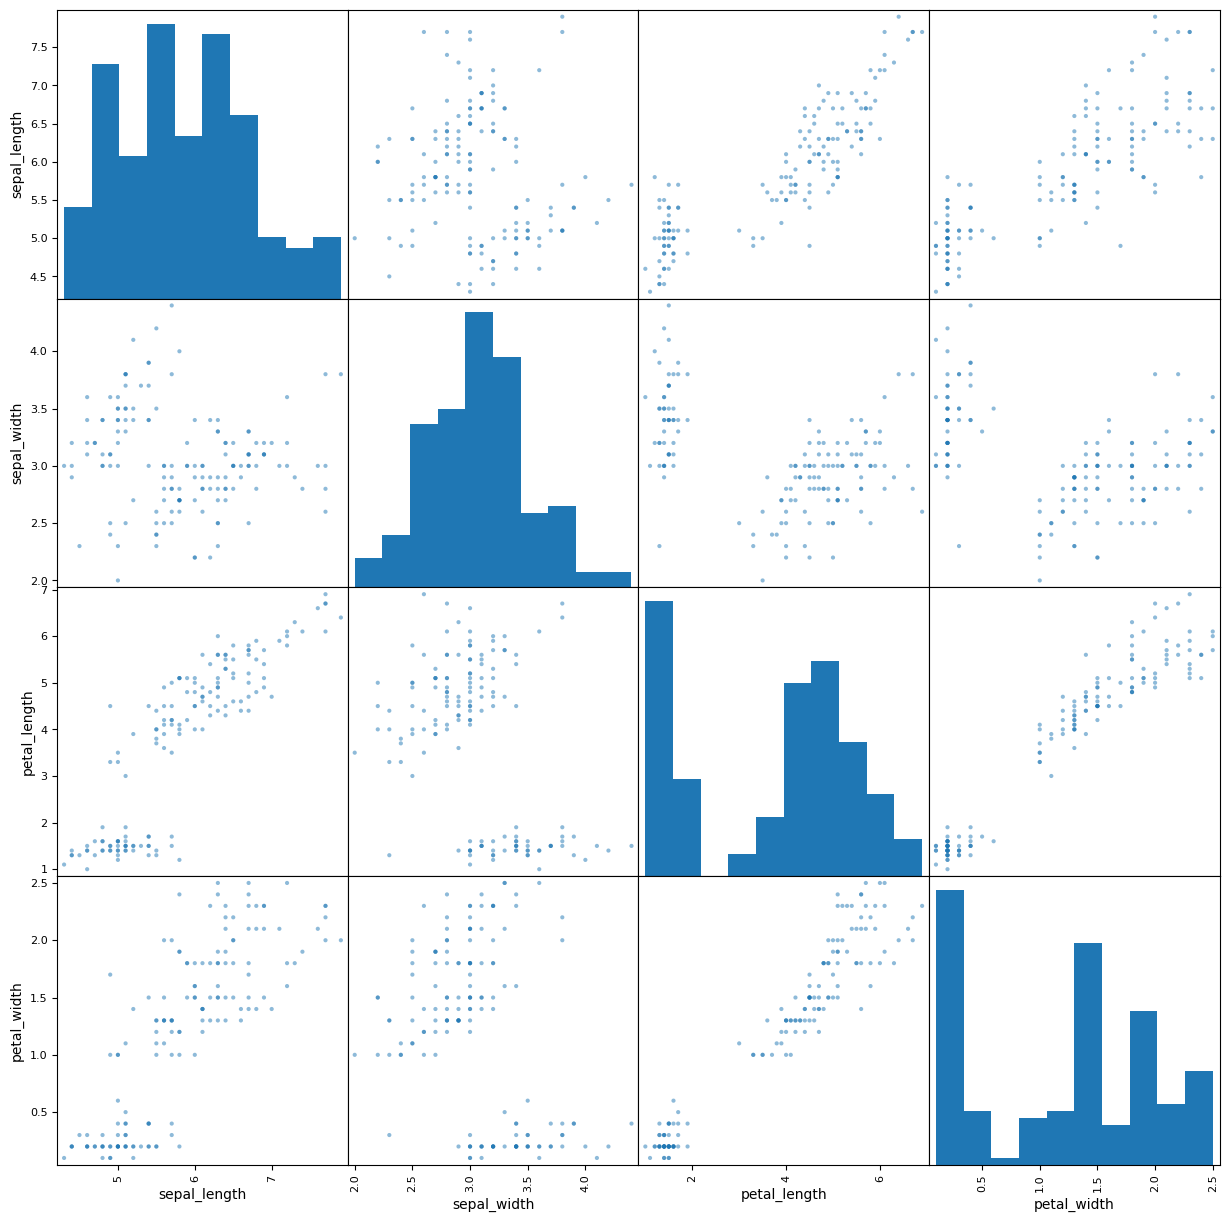

In [34]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(15,15))
plt.show()

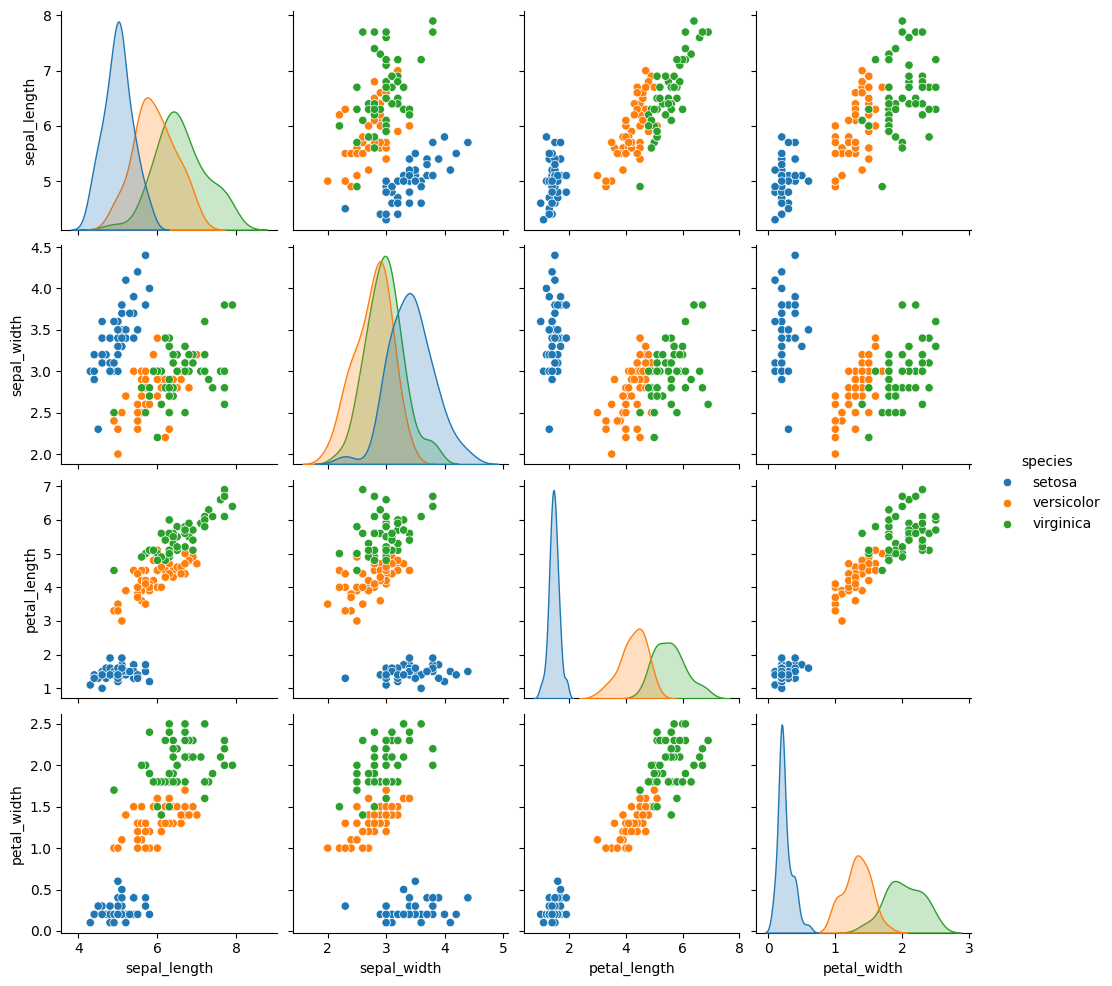

In [20]:
sns.pairplot(data, hue='species')

In [21]:
# -- Entrenando el modelo --
# Separando los datos en variables dependientes e independientes
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [28]:
# Dividir el dataset para entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Dividir el dataset para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
# Resumen de predicciones con CART ( Arbol de Decision )
from sklearn.tree import (DecisionTreeClassifier)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

arbol_clasificado = DecisionTreeClassifier()
arbol_clasificado.fit (X_train, y_train)

y_pred = arbol_clasificado.predict(X_test)

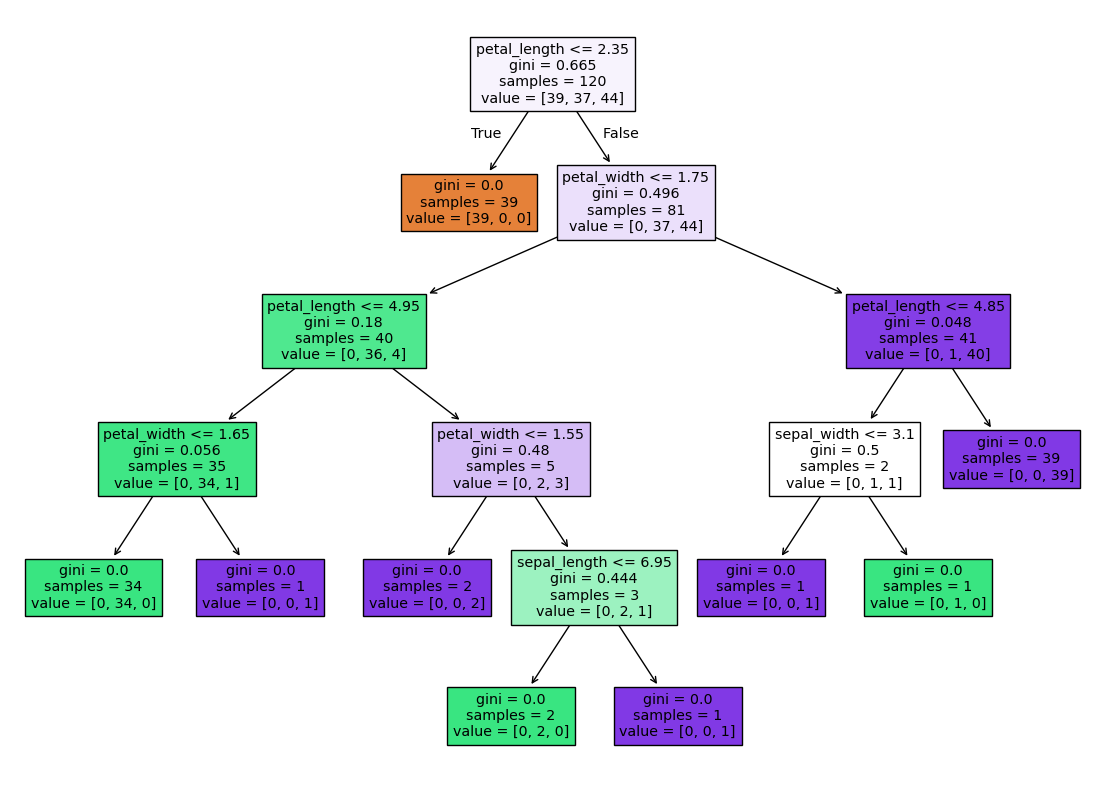

In [35]:
# Grafico del Arbol de Decision
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize= (14,10))
plot_tree(arbol_clasificado, filled=True, feature_names=data.columns.values )
plt.show()

In [39]:
# Resumen de las predicciones aplicando el modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [43]:
# Precision del Modelo
from sklearn.metrics import accuracy_score
print('La efectividad es: ', accuracy_score(y_pred, y_test))

La efectividad es:  1.0
